In [ ]:
###CAPSTONE.
##House Price Determination using regression echnique
# References    https://www.kaggle.com/code/bharathbanala/house-price-brb-pred
#               https://www.kaggle.com/code/hongjunepark/house-prices-project/notebook
#               https://www.kaggle.com/code/kanishkpareek/house-price-prediction-neural-step-by-step#Checking-the-corelation-beetween-the-predicted-and-training-column

In [54]:
%pip install sklearn

You should consider upgrading via the 'c:\Users\Temitope\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [55]:
# Load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [56]:
### Read data set (given as a .csv file) from the local directory
train=pd.read_csv("C:\\Users\\Temitope\\Desktop\\DSI\\Capstone Project\\house-prices-advanced-regression-techniques\\train.csv")

In [57]:
# Check 1st 10 rows
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
#COLUMNS
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
#Data clean up
# train to view numerical data only
train_num = train.select_dtypes(exclude=["object"])
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# train with missing values
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [60]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [53]:
# Getting dummies
train=pd.read_csv("C:\\Users\\Temitope\\Desktop\\DSI\\Capstone Project\\house-prices-advanced-regression-techniques\\train.csv")
print(pd.get_dummies(train))

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0          2003          2003    

In [62]:
train = train.drop(['Id'], axis=1)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [64]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


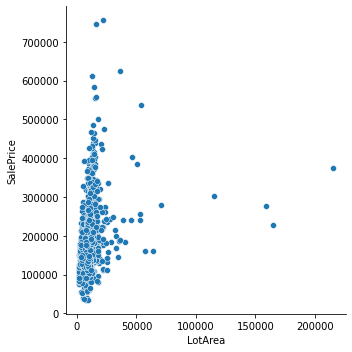

In [65]:
# Scatterplot to show some key features that have a correlation with the dependable variable(SalePrice).
sns.relplot(data=train, x='LotArea', y='SalePrice')

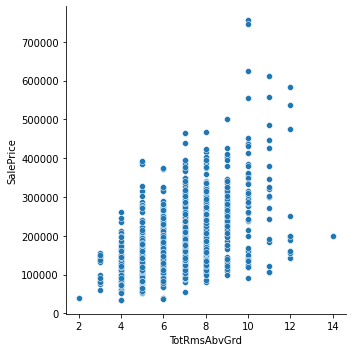

In [17]:
sns.relplot(data=train, x='TotRmsAbvGrd', y='SalePrice')

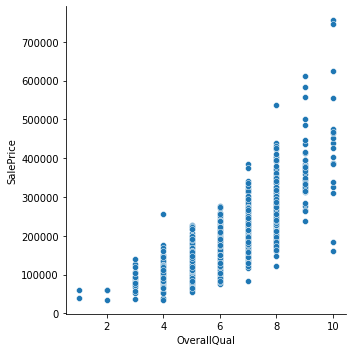

In [18]:
sns.relplot(data=train, x='OverallQual', y='SalePrice')

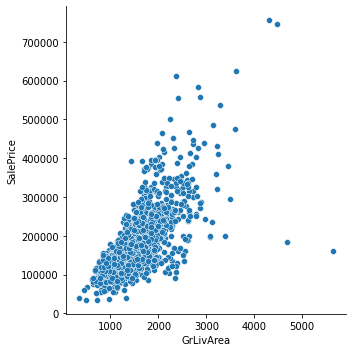

In [43]:
sns.relplot(data=train, x='GrLivArea', y='SalePrice')

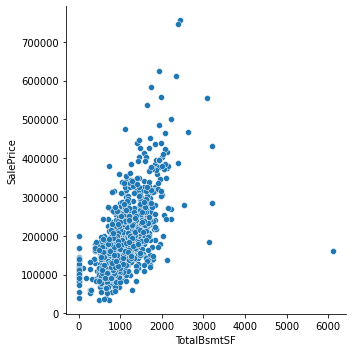

In [44]:
sns.relplot(data=train, x='TotalBsmtSF', y='SalePrice')

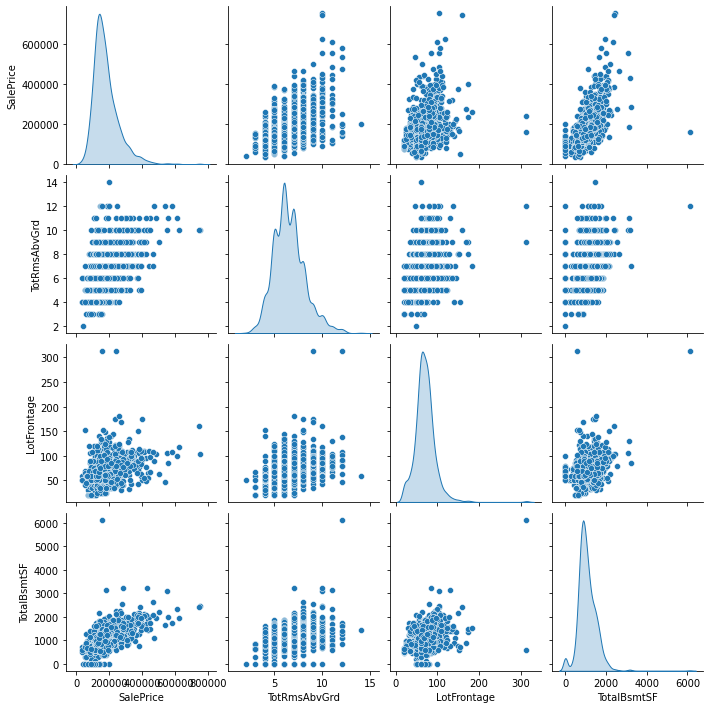

In [45]:
# Grid of scatterplot to identify correlation with saleprice
sns.pairplot(data=train,
             y_vars=['SalePrice','TotRmsAbvGrd','LotFrontage','TotalBsmtSF'], 
             x_vars=['SalePrice','TotRmsAbvGrd','LotFrontage','TotalBsmtSF'], 
             diag_kind='kde')

In [46]:
# r = coefficient of correlation. Used to identify strong positive correlation(+1) or strong negative correlation(-1).
train.corr().head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,...,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,...,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.077856


In [21]:
#Filtering r value to see how close the features correlates to the SalePrice
train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
MasVnrArea,0.477493
BsmtFinSF1,0.386420
LotFrontage,0.351799


<AxesSubplot:>

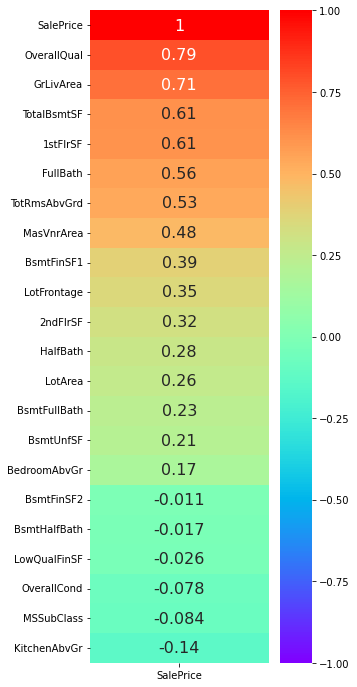

In [20]:
# Identifying the top features correlation between predicted and trainnig
best_features = train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(4,12))
sns.heatmap(best_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
## ## Creating, validating, and using a linear regression model
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    train[['OverallQual']], train[['SalePrice']], 
    test_size=0.20, random_state=1000)


In [72]:
x_train.shape

(1168, 1)

In [68]:
# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# validate the model with the test dataset
linearModel.score(x_test, y_test)

0.653866432804128

In [69]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[131784.35914376],
       [131784.35914376],
       [221815.01735377],
       [176799.68824877],
       [176799.68824877],
       [176799.68824877],
       [176799.68824877],
       [131784.35914376],
       [ 86769.03003876],
       [176799.68824877],
       [176799.68824877],
       [176799.68824877],
       [176799.68824877],
       [131784.35914376],
       [221815.01735377],
       [176799.68824877],
       [176799.68824877],
       [221815.01735377],
       [176799.68824877],
       [131784.35914376],
       [131784.35914376],
       [221815.01735377],
       [ 86769.03003876],
       [221815.01735377],
       [131784.35914376],
       [266830.34645877],
       [266830.34645877],
       [221815.01735377],
       [131784.35914376],
       [176799.68824877],
       [131784.35914376],
       [221815.01735377],
       [131784.35914376],
       [221815.01735377],
       [221815.01735377],
       [131784.35914376],
       [131784.35914376],
       [266830.34645877],
       [2668

In [70]:
# test MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

34082.02898590074

In [71]:
# train MAE
y_predicted_train = linearModel.predict(x_train)
mean_absolute_error(y_train, y_predicted_train)

33591.40813760415

In [73]:
print( "SalePrice = {0} * OverallQual+ {1}".format(str(linearModel.coef_[0][0]),str(linearModel.intercept_[0])))

SalePrice = 45015.32910500361 * OverallQual+ -93292.28638125496


In [29]:
## Plotting the predicted data

# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['OverallQual'], 
                 value_vars=['SalePrice','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,OverallQual,price_type,price_value
0,7,SalePrice,221500.0
1,7,SalePrice,164990.0
2,5,SalePrice,154300.0
3,8,SalePrice,187500.0
4,6,SalePrice,143000.0


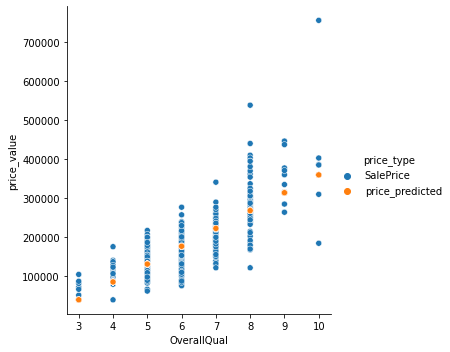

In [74]:
sns.relplot(data=melted, x='OverallQual', y='price_value', 
            hue='price_type')

In [ ]:
# Error using sklearn
  
# import the module
from sklearn.metrics import mean_absolute_error as mae
  
# list of integers of actual and calculated
actual = [2, 3, 5, 5, 9]
calculated = [3, 3, 8, 7, 6]
  
# calculate MAE
error = mae(actual, calculated)
  
# display
print("Mean absolute error : " + str(error))

<AxesSubplot:>

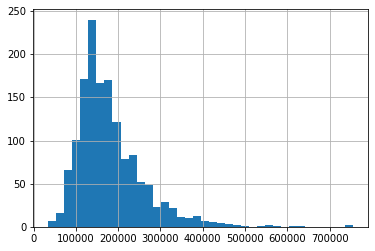

In [50]:
train.SalePrice.hist(bins=38)

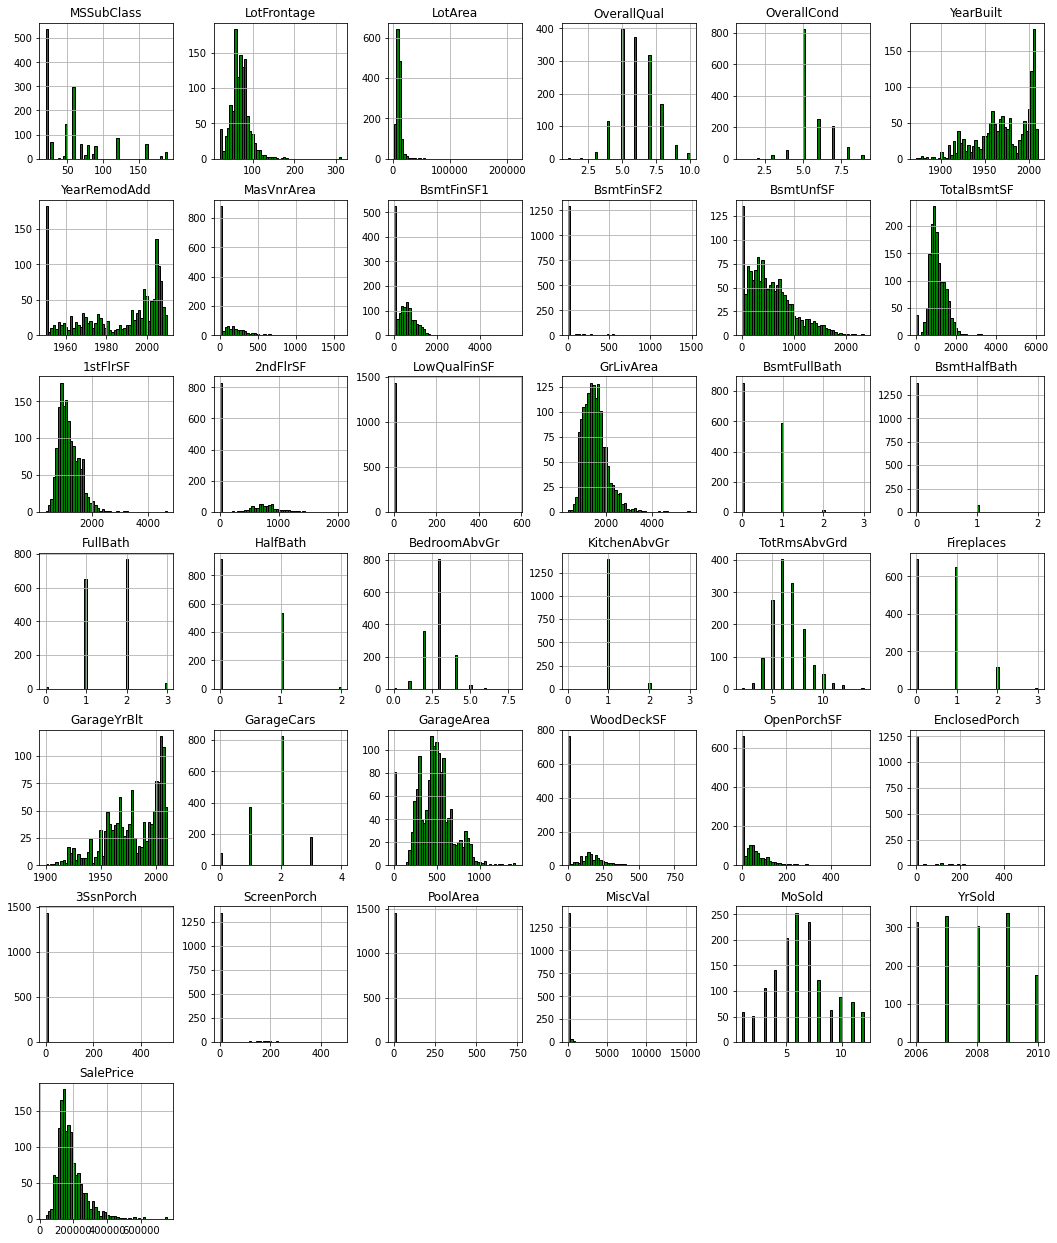

In [51]:
# Histogram distribution of all the numerical data
his = train_num.hist(figsize=(18, 22), bins=50, color="green",
                         edgecolor="black", xlabelsize=10, ylabelsize=10)

In [15]:
# QUANTILE
train_dist = train.quantile([i/20 for i in range(0,20)])
train_dist["quantile"] = train_dist.index
train_dist

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,quantile
0.00,1.00,20.0,21.0,1300.00,1.0,1.0,1872.0,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0,0.00
0.05,73.95,20.0,34.0,3311.70,4.0,4.0,1916.0,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,2.0,2006.0,88000.0,0.05
0.10,146.90,20.0,44.0,5000.00,5.0,5.0,1924.9,1950.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,3.0,2006.0,106475.0,0.10
0.15,219.85,20.0,50.0,6120.00,5.0,5.0,1936.0,1955.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,115000.0,0.15
0.20,292.80,20.0,53.0,7078.40,5.0,5.0,1947.8,1961.8,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,124000.0,0.20
0.25,365.75,20.0,59.0,7553.50,5.0,5.0,1954.0,1967.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0,0.25
0.30,438.70,20.0,60.0,8063.70,5.0,5.0,1958.0,1971.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,135500.0,0.30
0.35,511.65,20.0,60.0,8450.00,5.0,5.0,1961.0,1976.0,0.00,56.65,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,141000.0,0.35
0.40,584.60,30.0,63.0,8793.40,6.0,5.0,1965.0,1980.0,0.00,218.60,...,0.00,0.00,0.0,0.0,0.0,0.0,6.0,2007.0,147000.0,0.40
0.45,657.55,50.0,65.0,9100.00,6.0,5.0,1969.0,1989.0,0.00,312.00,...,6.20,0.00,0.0,0.0,0.0,0.0,6.0,2008.0,155000.0,0.45


In [56]:
# QUANTILE
train_dist = train.quantile([i/20 for i in range(0,20)])
train_dist["quantile"] = train_dist.index
train_dist

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,quantile
0.00,20.0,21.0,1300.00,1.0,1.0,1872.0,1950.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0,0.00
0.05,20.0,34.0,3311.70,4.0,4.0,1916.0,1950.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,2.0,2006.0,88000.0,0.05
0.10,20.0,44.0,5000.00,5.0,5.0,1924.9,1950.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,3.0,2006.0,106475.0,0.10
0.15,20.0,50.0,6120.00,5.0,5.0,1936.0,1955.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,115000.0,0.15
0.20,20.0,53.0,7078.40,5.0,5.0,1947.8,1961.8,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,124000.0,0.20
0.25,20.0,59.0,7553.50,5.0,5.0,1954.0,1967.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0,0.25
0.30,20.0,60.0,8063.70,5.0,5.0,1958.0,1971.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,135500.0,0.30
0.35,20.0,60.0,8450.00,5.0,5.0,1961.0,1976.0,0.00,56.65,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,141000.0,0.35
0.40,30.0,63.0,8793.40,6.0,5.0,1965.0,1980.0,0.00,218.60,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,6.0,2007.0,147000.0,0.40
0.45,50.0,65.0,9100.00,6.0,5.0,1969.0,1989.0,0.00,312.00,0.0,...,6.20,0.00,0.0,0.0,0.0,0.0,6.0,2008.0,155000.0,0.45


<AxesSubplot:xlabel='SalePrice'>

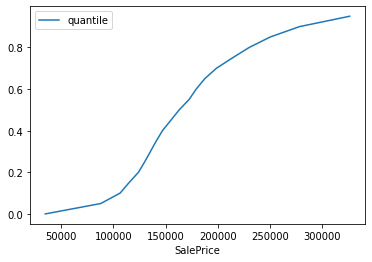

In [57]:
train_dist.plot.line(y="quantile", x = "SalePrice")

In [58]:
train["CumSalePrice"] = train.SalePrice.cumsum()

<AxesSubplot:>

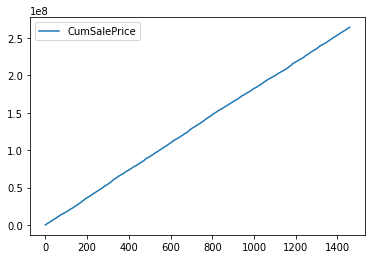

In [59]:
train.plot.line( y = "CumSalePrice")